In [4]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy.streaming import StreamListener
import os

In [5]:
os.chdir('D:/Education/SEM 08/NATURAL LANGUAGE PROCESSING/Assignment 3')

In [6]:
consumer_key = 'I6CPVr512X4QOQNVuZlFQUbpH'
consumer_secret = '5pexDlmBR4xn7V4iF8mHgHlLUu4n5aGXiqAYDF7w8hTuxyUbnY'
access_token = '2996074256-HQDp9b5hdRJdO78dK7U3pXpG2KfTxIIjcgBAX90'
access_secret = 'vsBhwBSTNZBETVqicRCmeQ7ySKhv1IwtSY2JfoU9Oiiro'

auth= OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)
api=tweepy.API(auth)


file= open('flood_tw.dat','a')


class Mylistener(StreamListener):
    def __init__(self, api=None):
        super(StreamListener,self).__init__()
        self.num_tweet = 0
        
    def on_data(self,data):
        try:
            with open('flood_filtered.dat','a') as f:
                tweet=json.loads(data)
                
                if tweet ['lang']=="en":
                    file.write(data)
                    file.write('\n')
                  
                if tweet['lang']=='en' and tweet["user"]["location"] == "Malaysia":
                    if self.num_tweet<110:
                        print(json.dumps(tweet["text"],indent=4))
                        f.write(tweet["text"])
                        f.write("\n")
                        self.num_tweets += 1
                        
                return True
        except BaseException as e:
            print("Error on_data: %s" % str(e))
        return True    
                    
def on_error(self,status):
        print(status)
        return True
def on_status(self,status):
    if status.retweeted_status=='true':
        return
    print(status)
      
mytwitter_stream = Stream(auth,Mylistener())
mytwitter_stream.filter(track=['flood' '#flood', '#FloodRelief', '#FloodMalaysia', 'FloodSelangor','Taman Sri Muda', 'Hulu Langat', '#TamanSriMuda','#FloodMalaysia', '#DauratBanjir', "#Banjir2021", 'banjir 2021','#banjir'])
file.close()
print("done")                  



done


In [7]:
posts = api.user_timeline(hashtags="#DauratBanjir", count = 100, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head(5)

Show the 5 recent tweets:

1) RT @kierannkater98: This angle is unreal 🤩🤩 https://t.co/Vew6waAYSc

2) RT @JackWilshere: That's offside at the Emirates!!

3) RT @ToniKroos: Yellow card. Of course.

4) RT @ijaicool: When We Were Young tapi versi rock leleh band start huruf S https://t.co/SMTEtaB0v9

5) nak cari intern pun payah ke, assessment cam anjeng



,Tweets
0,RT @kierannkater98: This angle is unreal 🤩🤩 ht...
1,RT @JackWilshere: That's offside at the Emirat...
2,RT @ToniKroos: Yellow card. Of course.
3,RT @ijaicool: When We Were Young tapi versi ro...
4,"nak cari intern pun payah ke, assessment cam a..."


In [8]:
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text

In [9]:

# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

df.info


<bound method DataFrame.info of                                                Tweets  Subjectivity  Polarity
0                         8: This angle is unreal 🤩🤩       0.000000  0.000000
1                  : That's offside at the Emirates!!      0.000000  0.000000
2                           : Yellow card. Of course.      0.000000  0.000000
3   : When We Were Young tapi versi rock leleh ban...      0.400000  0.100000
4   nak cari intern pun payah ke, assessment cam a...      0.000000  0.000000
..                                                ...           ...       ...
88  : Confirmed. Real Madrid have made a formal bi...      0.575000  0.275000
89       : Imagine if we demand this in Malaysia....       0.000000  0.000000
90  : Whoever this man riding a scooter screaming ...      0.000000  0.000000
91                 sudah la cari team lain jela terus      0.000000  0.000000
92  : HT: Arsenal 0-2 Chelsea\n\nArsenal should ha...      0.383333 -0.233333

[93 rows x 3 columns]>

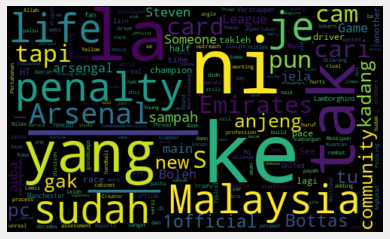

In [10]:
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [11]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    elif score>0:
        if score >=0.4:
            return "Booster"
        else:
            return "positive"

df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,8: This angle is unreal 🤩🤩,0.000000,0.000000,Neutral
1,: That's offside at the Emirates!!,0.000000,0.000000,Neutral
2,: Yellow card. Of course.,0.000000,0.000000,Neutral
3,: When We Were Young tapi versi rock leleh ban...,0.400000,0.100000,positive
4,"nak cari intern pun payah ke, assessment cam a...",0.000000,0.000000,Neutral
...,...,...,...,...
88,: Confirmed. Real Madrid have made a formal bi...,0.575000,0.275000,positive
89,: Imagine if we demand this in Malaysia....,0.000000,0.000000,Neutral
90,: Whoever this man riding a scooter screaming ...,0.000000,0.000000,Neutral
91,sudah la cari team lain jela terus,0.000000,0.000000,Neutral


Printing positive tweets:

Printing negative tweets:

1) handball? typical var

2) same old shit cam ozil 

3) _Official: Taking a break from FIFA 22. Game stinks.

4) _Comps: Harry Maguire - Proving His Doubters Wrong 😭🌊

 

5) aku je ke yang tak sec dose lagi ni?

6) takleh forfeit ke game ni 

7) : HT: Arsenal 0-2 Chelsea

Arsenal should have had a penalty and had a late flurry in the half but the gulf in class betw…



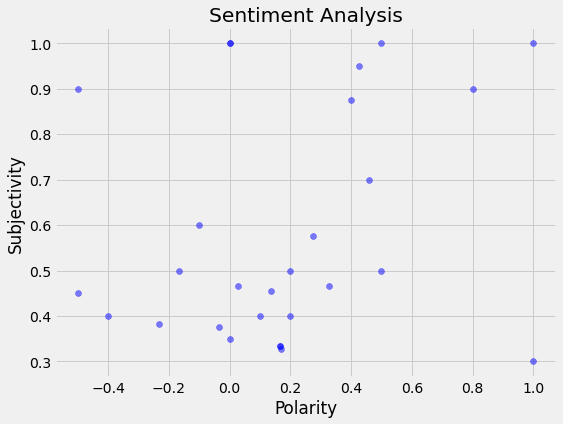

In [12]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue',alpha=0.5) 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()


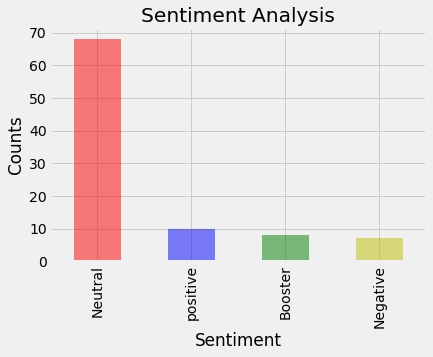

In [13]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

# Show the value counts
df['Analysis'].value_counts()

# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar',alpha=0.5,color=['r','b','g','y'])
plt.show() 